# Pymaceuticals Inc.
---
### Analysis

- This analysis looks at study data about the efficacy of several anti-cancer drug regimens that fight
- squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

- It appears that the Ramican regimen is the most effective, as its average tumor size is lowest.
 

In [649]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [650]:
# Checking the number of mice.
mouse_count = mouse_study_results["Mouse ID"].nunique()
mouse_count

249

In [651]:
# Get the duplicate mice by Mouse ID that shows up in mouse_study_results
duplicate_mice = mouse_study_results[mouse_study_results.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [652]:
# Optional: Get all the data for the duplicate Mouse ID
duplicate_mice_data = mouse_study_results[mouse_study_results['Mouse ID'].isin(duplicate_mice)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [653]:
# Create a clean DataFrame by dropping the duplicate mouse by its Mouse ID
clean_mouse_study_results = mouse_study_results[~mouse_study_results["Mouse ID"].isin(duplicate_mice)]
clean_mouse_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [654]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_study_results["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [655]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [656]:
# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen

# Group the data by drug regimen
grouped_data = clean_mouse_study_results.groupby("Drug Regimen")

# Calculate the summary values for each drug regimen
mean_tumor_volume = grouped_data["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_data["Tumor Volume (mm3)"].median()
var_tumor_volume = grouped_data["Tumor Volume (mm3)"].var()
std_tumor_volume = grouped_data["Tumor Volume (mm3)"].std()
sem_tumor_volume = grouped_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": var_tumor_volume,
    "Tumor Volume Std. Dev.": std_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [657]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_agg = grouped_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_statistics_agg

######## How to get the title listed as the starter code shows: Tumor Volume (mm3)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [658]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

In [659]:
# Group the data by drug regimen and squeeze to one column
timepoint_count = clean_mouse_study_results.groupby("Drug Regimen").size()
timepoint_count = timepoint_count.squeeze()
timepoint_count = timepoint_count.sort_values(ascending=False)
timepoint_count.head()

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
dtype: int64

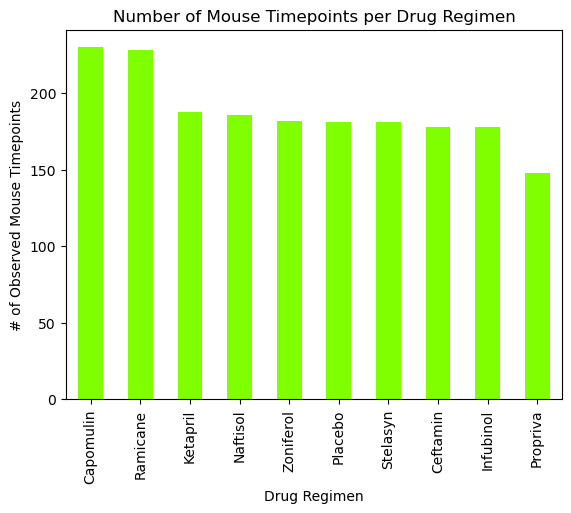

In [660]:
# Plot the graph in a pretty colour
timepoint_graph = timepoint_count.plot.bar(color='chartreuse')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mouse Timepoints per Drug Regimen")
plt.show()

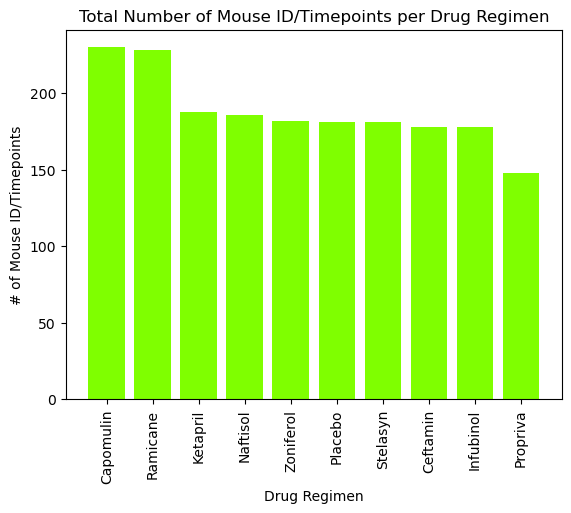

In [661]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = range(len(timepoint_count))
plt.bar(x_axis, drug_regimen_count, color='chartreuse')
plt.xticks(x_axis, drug_regimen_count.index, rotation='vertical')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Mouse ID/Timepoints")
plt.title("Total Number of Mouse ID/Timepoints per Drug Regimen")

plt.show()

In [662]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [663]:
# Create dataframe for each Mouse ID and its Sex
mouse_gender = clean_mouse_study_results[['Mouse ID', 'Sex']].drop_duplicates()
mouse_gender.reset_index(drop=True, inplace=True)
mouse_gender.head()

,Mouse ID,Sex
0,b128,Female
1,f932,Male
2,g107,Female
3,a457,Female
4,c819,Male


In [664]:
# Sum number for each gender
mouse_gender_count = mouse_gender.groupby("Sex").size()
mouse_gender_count

Sex
Female    123
Male      125
dtype: int64

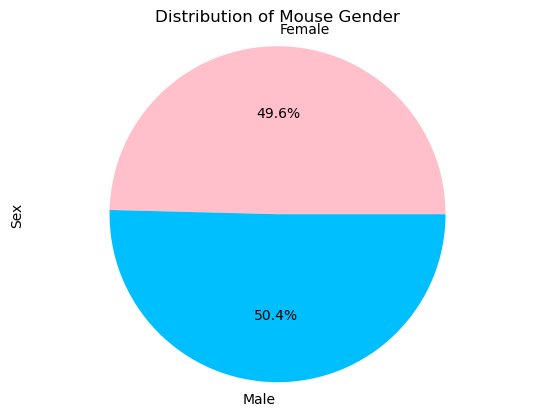

In [665]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colours = ['pink', 'deepskyblue']

mouse_gender_count.plot(kind='pie', autopct='%1.1f%%', colors=colours)

plt.title('Distribution of Mouse Gender')
plt.axis('equal')
plt.ylabel('Sex')
plt.show()

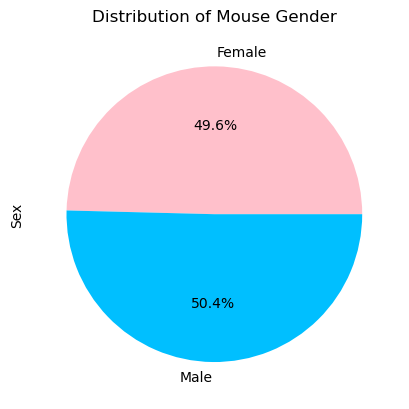

In [666]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colours = ['pink', 'deepskyblue']
plt.pie(mouse_gender_count, labels=mouse_gender_count.index, autopct="%1.1f%%", colors = colours)
plt.title("Distribution of Mouse Gender")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [667]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create dataframe for all rows for subset of regimens in drug_regimens
drug_regimens_rows = clean_mouse_study_results[clean_mouse_study_results["Drug Regimen"].isin(drug_regimens)]
drug_regimens_rows.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [668]:
# Start by getting the last (greatest) timepoint for each mouse
# Get the max timepoint for each mouse id
max_timepoints = drug_regimens_rows.groupby("Mouse ID")["Timepoint"].max().reset_index()
max_timepoints.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [669]:
# Merge this group df with the original results set to get the tumor volume at the last timepoint for each mouse
final_tumor_volume = max_timepoints.merge(drug_regimens_rows, on=["Mouse ID", "Timepoint"])
final_tumor_volume = final_tumor_volume[["Drug Regimen", "Tumor Volume (mm3)"]]
final_tumor_volume = final_tumor_volume.rename(columns={"Tumor Volume (mm3)": "Final Tumor Volume (mm3)"})
final_tumor_volume.head()

,Drug Regimen,Final Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Ceftamin,62.999356
3,Ramicane,38.407618
4,Ramicane,43.047543


In [670]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [671]:
# Calculate the IQR, quartiles, and bounds to determine if there are any potential outliers. 
for drug in drug_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == drug, "Final Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Print results
    print(f"{drug} potential outliers: {tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]}")

Capomulin potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Final Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


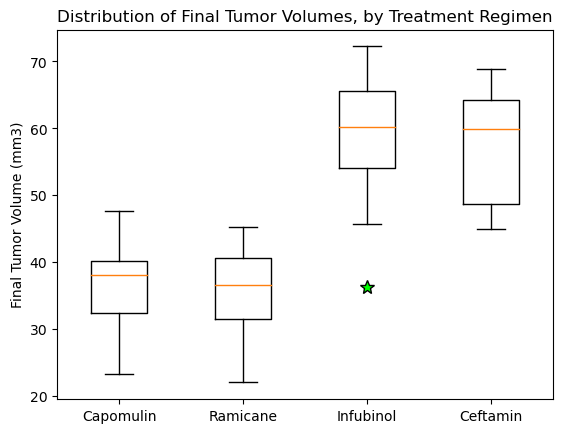

In [672]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, flierprops={'marker': '*', 'markerfacecolor': 'lime', 'markersize': 10})

# Set x-axis, y-axis, labels and title
ax.set_xticklabels(drug_regimens)
ax.set_title("Distribution of Final Tumor Volumes, by Treatment Regimen")

# Set y-axis label
ax.set_ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

In [673]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

In [674]:
# Create dataframe for specific mouse: l509
specific_mouse_data = drug_regimens_rows[drug_regimens_rows["Mouse ID"] == "l509"]
specific_mouse_data = specific_mouse_data[["Timepoint", "Tumor Volume (mm3)"]]
specific_mouse_data.head()

,Timepoint,Tumor Volume (mm3)
1721,0,45.000000
1722,5,45.851193
1723,10,46.759074
1724,15,47.488599
1725,20,48.070452


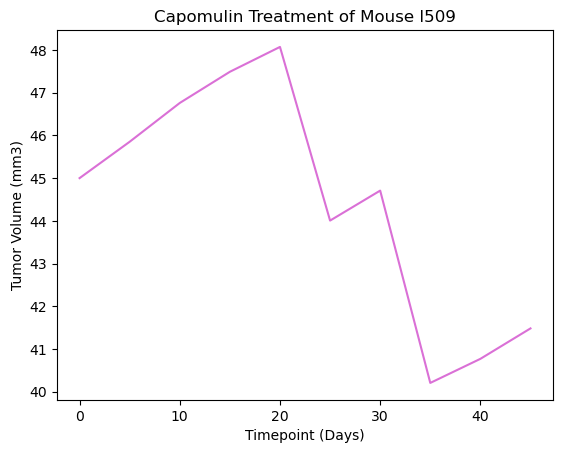

In [675]:
# Plot the graph with the data contained in the dataframe for the specific mouse
plt.plot(specific_mouse_data['Timepoint'], specific_mouse_data['Tumor Volume (mm3)'], color = 'orchid')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')
plt.show()

In [676]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

In [677]:
# Create a dataframe for all rows with Capomulin regimen
capomulin_rows = clean_mouse_study_results[clean_mouse_study_results["Drug Regimen"] == "Capomulin"]
capomulin_rows.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [678]:
# Calculate average tumor size for each mouse and return its weight
capomulin_data = capomulin_rows.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "first"})

capomulin_data = capomulin_data[["Tumor Volume (mm3)", "Weight (g)"]]
capomulin_data = capomulin_data.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
capomulin_data = capomulin_data.reset_index(drop=True)
capomulin_data.head()

,Average Tumor Volume (mm3),Weight (g)
0,41.963636,22
1,40.083699,21
2,36.505973,17
3,41.990097,19
4,44.613344,22


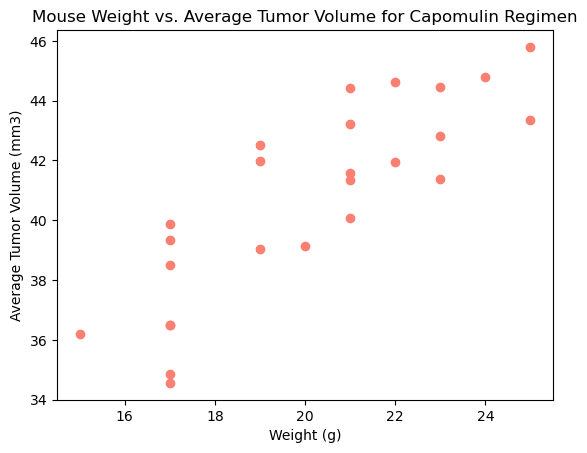

In [679]:
# Plot the scatter data
plt.scatter(new_df["Weight (g)"], new_df["Tumor Volume (mm3)"], color = "salmon")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show()

## Correlation and Regression

In [680]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

In [681]:
# Import linear regression package
from scipy.stats import linregress

In [682]:
# Calculate the correlation coefficient
corr_coeff = capomulin_data["Weight (g)"].corr(capomulin_data["Average Tumor Volume (mm3)"])
corr_coeff

0.8419363424694722

In [683]:
# Calculate the linear regression model
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_data["Weight (g)"], capomulin_data["Average Tumor Volume (mm3)"])
regress_values = slope * capomulin_data["Weight (g)"] + intercept
regress_values.head()

0    42.549834
1    41.595394
2    37.777635
3    39.686515
4    42.549834
Name: Weight (g), dtype: float64

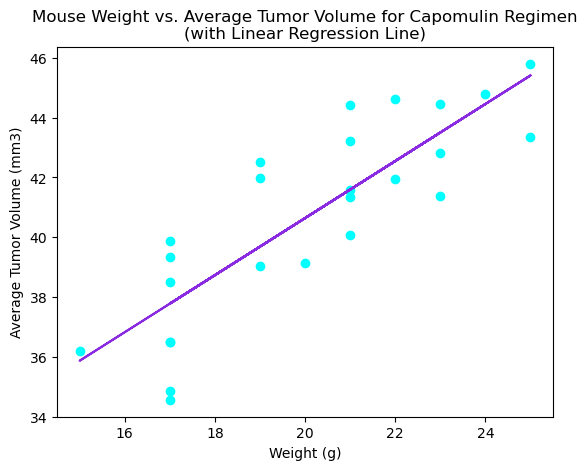

In [684]:
# Plot the scatter plot with linear regression line
plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Average Tumor Volume (mm3)"], color='aqua')
plt.plot(capomulin_data["Weight (g)"], regress_values, color='blueviolet')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen\n(with Linear Regression Line)")
plt.show()